<a href="https://colab.research.google.com/github/KashProgramming/DAML_Task4_DT_RF/blob/main/DAML_Task4_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAML Tasks/Task4/random_Forest.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   gender               777715 non-null  object 
 2   has_car              777715 non-null  object 
 3   has_home             777715 non-null  object 
 4   no_of_children       777715 non-null  int64  
 5   total_income         777715 non-null  float64
 6   income_status        777715 non-null  object 
 7   highest_education    777715 non-null  object 
 8   relationship_status  777715 non-null  object 
 9   house_type           777715 non-null  object 
 10  dob_count            777715 non-null  int64  
 11  days_employed_Count  777715 non-null  int64  
 12  has_mobile           777715 non-null  int64  
 13  has_work_phone       777715 non-null  int64  
 14  has_Any_phone        777715 non-null  int64  
 15  email_given      

In [4]:
# Finding percentage of null values in job_type as it is the only column with null values
print((df["job_type"].isnull().sum()/df.count().max())*100)

30.86580559716606


In [5]:
# Replacing the null values in job type with the most common value
df["job_type"].fillna(df["job_type"].mode()[0],inplace=True)

<ipython-input-5-b8d71b5b3a6b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["job_type"].fillna(df["job_type"].mode()[0],inplace=True)


In [6]:
# Dropping any duplicate rows in the dataframe
df.drop_duplicates(inplace=True)
# We will also drop the column ID, as it is not relevant
df.drop("ID",axis=1,inplace=True)
df.head()

,gender,has_car,has_home,no_of_children,total_income,income_status,highest_education,relationship_status,house_type,dob_count,days_employed_Count,has_mobile,has_work_phone,has_Any_phone,email_given,job_type,family_size,record_month_count,def_status
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2,0,C
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2,-1,C
2,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2,-2,C
3,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2,-3,C
4,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2,-4,C


In [7]:
yes_no={
    "N": 0,
    "Y": 1
}
gender={
    "F": 1,
    "M": 0
}
df["has_car"]=df["has_car"].map(yes_no)
df["has_home"]=df["has_home"].map(yes_no)
df["gender"]=df["gender"].map(gender)

In [8]:
# As evident from the max values and mean values, days_employed_Count, no_of_children and family_size have outliers which need to be handled
df.describe()

,gender,has_car,has_home,no_of_children,total_income,dob_count,days_employed_Count,has_mobile,has_work_phone,has_Any_phone,email_given,family_size,record_month_count
count,777715.000000,777715.000000,777715.000000,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,0.667148,0.391352,0.659558,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,0.471234,0.488053,0.473858,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,0.000000,0.000000,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,0.000000,0.000000,0.000000,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,1.000000,0.000000,1.000000,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,1.000000,1.000000,1.000000,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,1.000000,1.000000,1.000000,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [9]:
# Handling outliers by capping the values above and below the upper and lower quartiles respectively
def handle_outliers(series):
    Q1=series.quantile(0.25)
    Q3=series.quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return series.clip(lower=lower_bound,upper=upper_bound)
df["no_of_children"]=handle_outliers(df["no_of_children"])
df["family_size"]=handle_outliers(df["family_size"])
# df["days_employed_Count"]=handle_outliers(df["days_employed_Count"])
df.describe()

,gender,has_car,has_home,no_of_children,total_income,dob_count,days_employed_Count,has_mobile,has_work_phone,has_Any_phone,email_given,family_size,record_month_count
count,777715.000000,777715.000000,777715.000000,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,0.667148,0.391352,0.659558,0.416648,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.197983,-19.373564
std,0.471234,0.488053,0.473858,0.690885,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.863799,14.082208
min,0.000000,0.000000,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,0.000000,0.000000,0.000000,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,1.000000,0.000000,1.000000,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,1.000000,1.000000,1.000000,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,1.000000,1.000000,1.000000,2.500000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,4.500000,0.000000


In [10]:
df["def_status"].value_counts()

,count
def_status,
C,329536
0,290654
X,145950
1,8747
5,1527
2,801
3,286
4,214


In [11]:
# Combining classes with very few values to better handle class imbalance
df["def_status"].replace({"4":"C","3":"0","2":"X"},inplace=True)
df["def_status"].value_counts()

<ipython-input-11-31e5e50b02f3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["def_status"].replace({"4":"C","3":"0","2":"X"},inplace=True)


,count
def_status,
C,329750
0,290940
X,146751
1,8747
5,1527


In [12]:
# Encoding categorical columns using label encoder
from sklearn.preprocessing import LabelEncoder
cat_columns=["income_status","highest_education","relationship_status","house_type","job_type","def_status"]
# Creating different encoders for each column and storing together in a dictionary
encoders={}
for col in cat_columns:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    encoders[col]=le

In [13]:
df["has_mobile"].value_counts()

,count
has_mobile,
1,777715


In [14]:
# Since has_mobile has all values of 1, we drop this column
df.drop("has_mobile",axis=1,inplace=True)

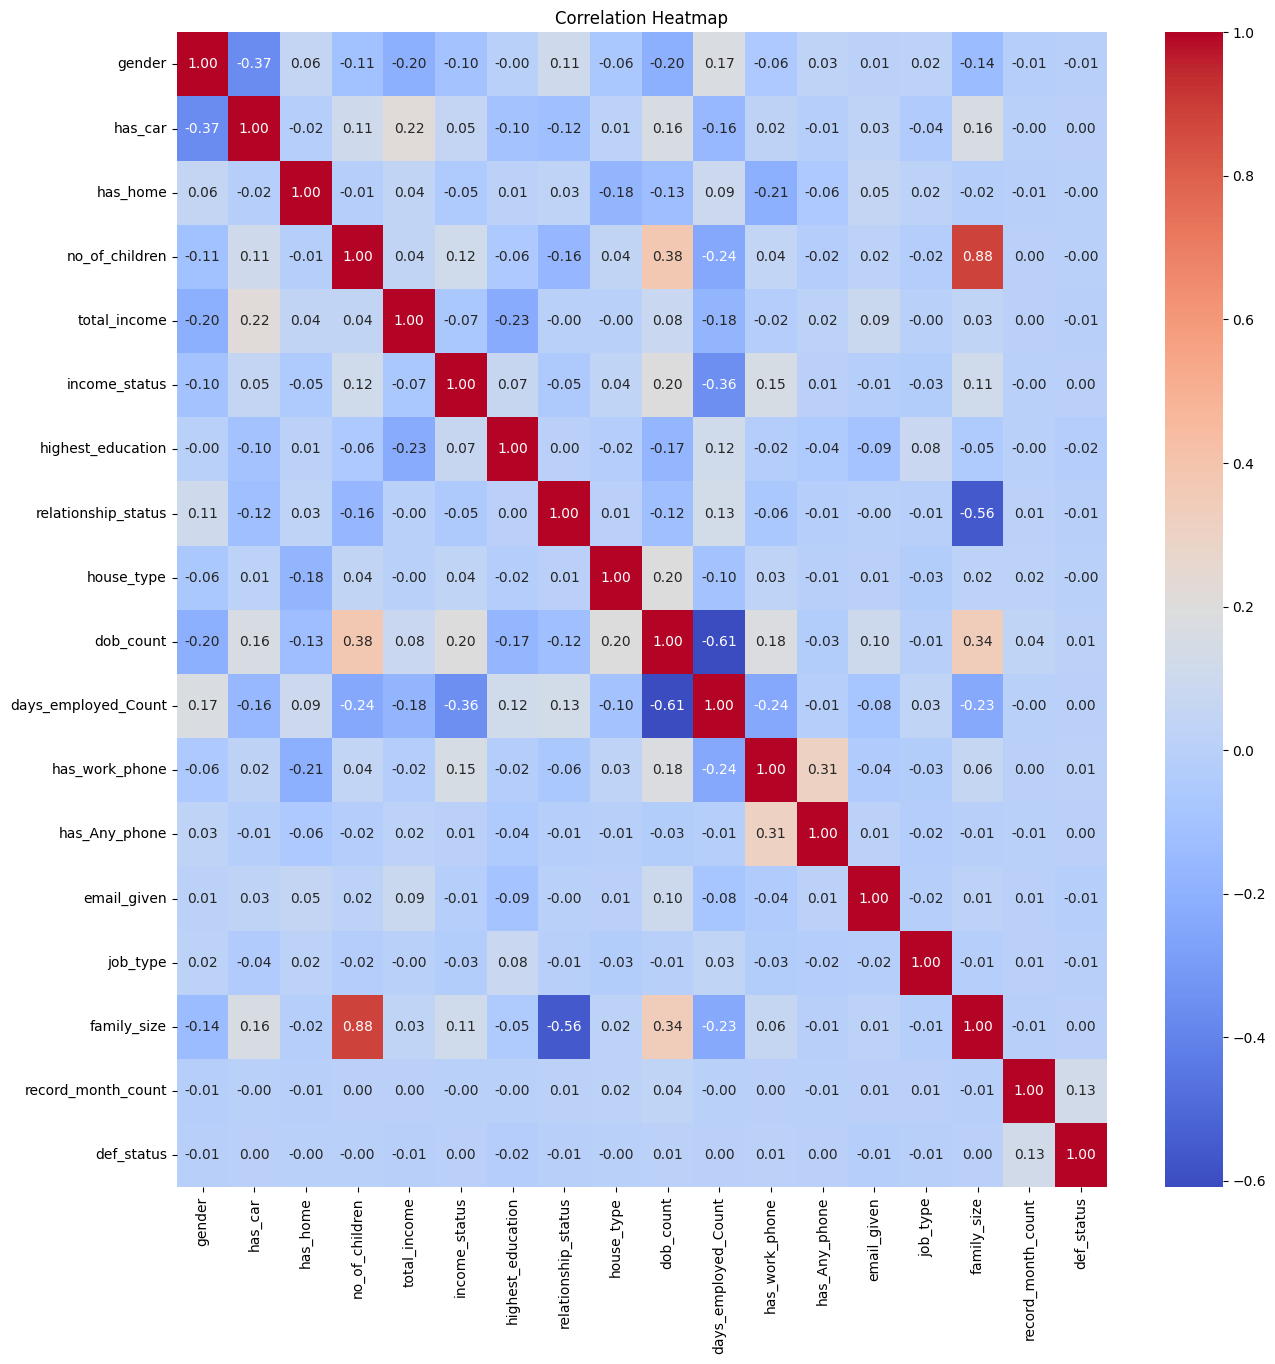

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
x=df.drop(columns=["def_status"])
y=df["def_status"]
# Splitting the data into 65% train and 35% test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=42)
# Using smote to handle class imbalance
smote=SMOTE(random_state=42)
x_resampled,y_resampled=smote.fit_resample(x_train,y_train)

In [17]:
param_grid={
    "n_estimators": [50,100],
    "max_depth": [5,10,15],
    "min_samples_split": [2,5],
    "min_samples_leaf": [1,2]
}

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(class_weight="balanced",random_state=42,n_jobs=-1)
random_search=RandomizedSearchCV(rf_model,param_distributions=param_grid,n_iter=10,cv=3,scoring="accuracy",random_state=42)
random_search.fit(x_resampled,y_resampled)
best_rf_model=random_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred=best_rf_model.predict(x_test)
print(f"Accuracy score: {accuracy_score(y_test,y_pred)}")
print(f"\nClassification Report:\n{classification_report(y_test,y_pred)}")
print(f"\nConfusion Matrix:\n{confusion_matrix(y_test,y_pred)}")

Accuracy score: 0.6120403672286289

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.51      0.58    101684
           1       0.08      0.45      0.13      2998
           2       0.20      0.89      0.33       538
           3       0.69      0.69      0.69    115809
           4       0.54      0.65      0.59     51172

    accuracy                           0.61    272201
   macro avg       0.44      0.64      0.46    272201
weighted avg       0.65      0.61      0.62    272201


Confusion Matrix:
[[51356  7978   709 26442 15199]
 [  770  1347    50   545   286]
 [   16    23   480    11     8]
 [15454  6385   875 80302 12793]
 [ 7542  1905   300  8312 33113]]
